# Load one of the datasets in the datasets directory

In [2]:
# add code here
import pandas as pd

df = pd.read_csv('../../datasets/iris_scaled.csv')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


In [3]:
Target = df.Species.values

df.drop('Species', axis='columns', inplace=True)

### scale the data if necessary

In [4]:
# add code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## split the data into train and test

In [5]:
# add code here
from sklearn.model_selection import train_test_split

x = df
y = Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60, 4), (90, 4), (60,), (90,))

## Experiment with Linear/Logistic Regression and Lasso/Ridge Regression

ValueError: x and y must be the same size

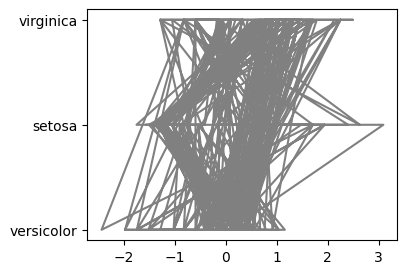

In [6]:
# add code here
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import numpy as np

classifiers = dict(
    LR = LogisticRegression(), ridge=Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4,3))

    for _ in range(6):
        clf.fit(x_train, y_train)

        ax.plot(x_test, clf.predict(x_test), color='gray')
        ax.scatter(x_train, y_train, s=3, c='gray', marker='o', zorder=10)
    
    clf.fit(x_train, y_train)
    ax.plot(x_test, clf.predict(x_test), linewidth=2, color='blue')
    ax.scatter(x_train, y_train, s=30, c='red', marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0,2)
    ax.set_ylim(0,1.6)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    fig.tight_layout()

plt.show()

### What are the coefficients and intercepts of the models?

In [ ]:
# add code here
print(f'Intercepts: {model.intercept_}')
print(f'Coeficients: {model.coef_}')

Intercepts: [-0.43614864  1.48056465 -1.04441601]
Coeficients: [[-0.86933383  0.75343619 -1.41952211 -1.35729773]
 [ 0.52891418 -0.41315543 -0.32230963 -0.55751584]
 [ 0.34041966 -0.34028076  1.74183174  1.91481356]]


## Evaluate the models using the test data

In [ ]:
# add code here
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)

accuracy

0.9666666666666667